# From Scratch: Linear Regression (Simple)

I implemented linear regression with a single feature from scratch. In this case, the task boils down to finding the equation of the best-fit line for some given collection of points on the 2D plane (X-Y).

### 1 / Import libraries

We only need numpy (for matrix calculations) and matplotlib (for visualizations).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 2 / Generating sample data

I randomly sampled 100 data points for $y=3x+4$ with some noise.

X shape: (100, 1)
y shape: (100, 1)


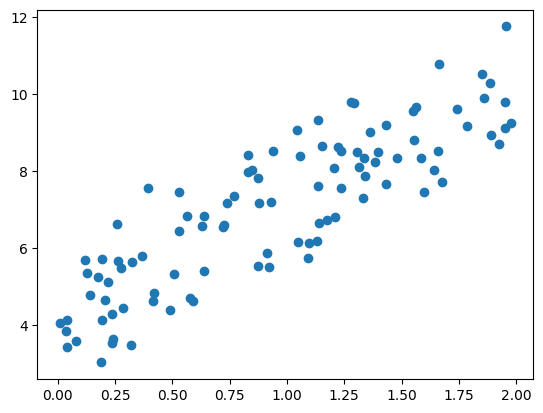

In [3]:
np.random.seed(0) # fixed so that results are replicable
sample_size = 100

X = 2 * np.random.rand(sample_size,1)
y = 4 + 3 * X + np.random.randn(sample_size,1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
plt.scatter(X,y)

### 3 / Regression Setup

Hypothesis: $h_\theta(x) = X_b \cdot \theta$ where $X_b$ denotes the feature matrix X with appended constant column, and $\theta$ denotes the coefficients of regression.

In this single feature case, $\theta = [\theta_0 , \theta_1]$ where $h_\theta(x) = \theta_0 + \theta_1 x$.

In [4]:
# Adding constant column to the feature matrix
Xb = np.c_[np.ones(sample_size), X]
print(Xb[0:5])
print(y[0:5])

[[1.         1.09762701]
 [1.         1.43037873]
 [1.         1.20552675]
 [1.         1.08976637]
 [1.         0.8473096 ]]
[[6.12773118]
 [9.19196269]
 [8.0822427 ]
 [5.73305541]
 [8.03018099]]


### 4 / Regression (Gradient Descent)

Here, I performed [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) with mean-squared error as the loss function:

$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

The parameters $\theta$ is updated as:

$\theta_0 := \theta_0 - \alpha \frac{1}{m} \frac{\partial J}{\partial \theta_0} = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \frac{\partial J}{\partial \theta_1} = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]x^{(i)}$

In matrix notation, this becomes:

$\theta := \theta - \alpha \frac{1}{m} (X_b^{T} \cdot \text{error})$ where $\text{error}$ is the column matrix of all $h_\theta(x^{(i)})-y^{(i)}$.

Learning rate (alpha): 0.01
Gradient descent iterations: 1000
Regression parameter (theta) shape: (2, 1)
----------------------------------
Final parameters:[[4.05727729]
 [3.11476492]]
Final absolute mean error:0.0265795428140596


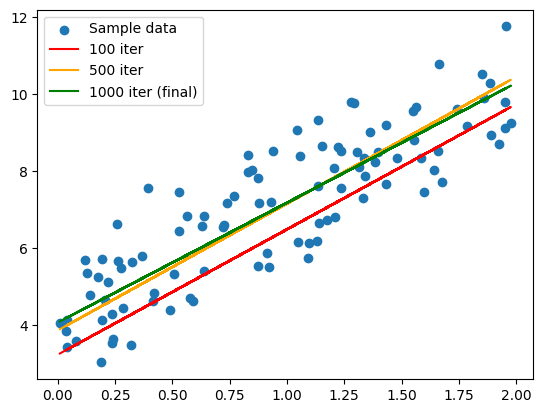

In [10]:
# Hyperparameters
alpha = 0.01
iterations = 1000
theta = np.array([[1], [1]])

print(f"Learning rate (alpha): {alpha}")
print(f"Gradient descent iterations: {iterations}")
print(f"Regression parameter (theta) shape: {theta.shape}")

m = Xb.shape[0]
theta100 = 0
theta500 = 0
for iter in range(iterations):
    predictions = Xb.dot(theta) 
    error = predictions - y 
    gradient = 1/m * Xb.T.dot(error) 
    theta = theta - alpha * gradient

    # print(f"Iter. {iter+1}: {np.sum(error)}")
    if (iter==100-1):
        theta100 = theta
    if (iter==500-1):
        theta500 = theta

print(f"----------------------------------")
print(f"Final parameters:{theta}")
print(f"Final absolute mean error:{abs(np.sum(error)/m)}")
final_predictions = Xb.dot(theta)

plt.scatter(X,y, label='Sample data')
plt.plot(X,Xb.dot(theta100), color="red", label="100 iter")
plt.plot(X,Xb.dot(theta500), color="orange", label="500 iter")
plt.plot(X,final_predictions, color="green", label="1000 iter (final)")
plt.legend()
plt.show()